# Global Emissions Dataset EDA

# About the Dataset

**Details about the columns:**
1. region: Geographical region.
2. country: Country of emission.
3. emissions: Methane emissions (in kilotons).
4. type: Sector from which emissions occur.
5. segment: Sub-sector from which emissions occur.
6. reason: Reason for the emission.
7. baseYear: Base year for tracking emissions.
8. notes: Additional information or source of data.

# Exploratory Questions for Sustainability Analysis

**Regional Insights:**

Which region has the highest total methane emissions?

How do methane emissions vary across regions?

**Country-Level Analysis:**

Which country emits the highest and lowest methane?

What are the top 5 countries contributing to global methane emissions?

**Sectoral Breakdown:**

Which sector contributes the most/least to methane emissions?

How are emissions distributed across sectors in high-emission countries?

**Trends and Patterns:**

Are there correlations between specific segments and reasons for emissions?

**Sub-Sector and Reason:**

What are the most common reasons for methane emissions?

Which sub-sector has the largest emissions globally?

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
data = pd.read_csv('/kaggle/input/global-methane-emissions/Methane_final.csv')

# Clean & Prepare Data

Heres a step by step break down of the cleaning process on this dataset:

In [3]:
#First get an index of columns to see what you're working with
print(data.columns)


Index(['Unnamed: 0', 'region', 'country', 'emissions', 'type', 'segment',
       'reason', 'baseYear', 'notes'],
      dtype='object')


In [4]:
#Use drop operation to remove 'Unnamed: 0':
data = data.drop(columns=['Unnamed: 0'])


In [5]:
#Verify it was dropped sucessfully
print(data.columns)


Index(['region', 'country', 'emissions', 'type', 'segment', 'reason',
       'baseYear', 'notes'],
      dtype='object')


In [6]:
#Normalize text columns
#text_columns: This is a list of column names in the dataset that contain text
text_columns = ['region', 'country', 'type', 'segment', 'reason', 'notes']

#data[text_columns]: Select those specific columns in the DataFrame for processing
#apply(lambda x: ...): This applies a transformation to each column in the list
#x.str.strip(): Removes any extra spaces at the beginning or end of each text value
data[text_columns] = data[text_columns].apply(lambda x: x.str.strip().str.title())

#Convert 'baseYear' to datetime format with error handling
data['baseYear'] = pd.to_datetime(data['baseYear'], format='%Y', errors='coerce')

#Handle missing values in 'baseYear'
data['baseYear'] = data['baseYear'].fillna(pd.NaT)  # Use NaT for missing dates

#Optional: Replace NaT with 'Unknown' if necessary
data['baseYear'] = data['baseYear'].fillna('Unknown').astype('object')


# Total Methane Emissions by Region

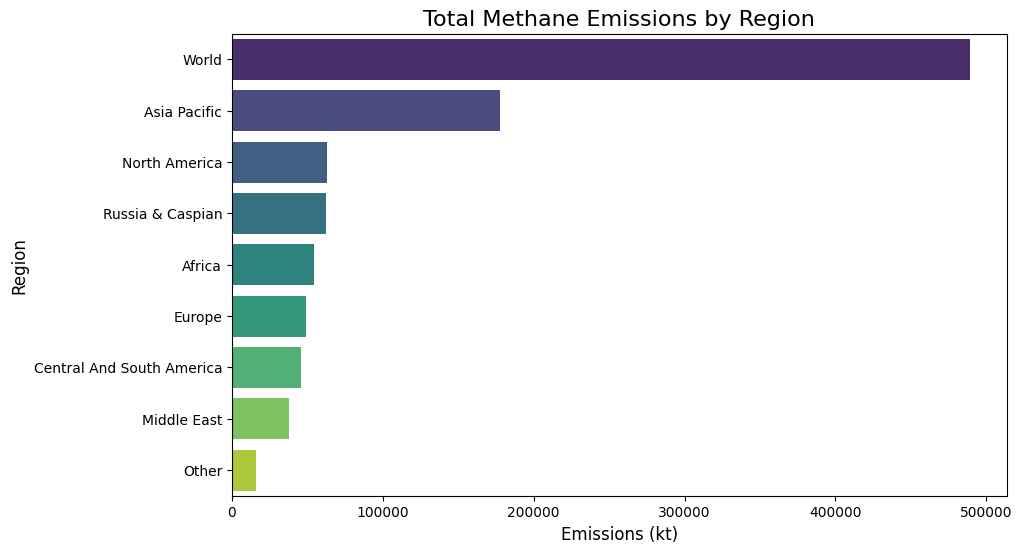

In [7]:
#Plotting total emissions by region
regional_emissions = data.groupby('region')['emissions'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=regional_emissions.values, y=regional_emissions.index, palette="viridis")
plt.title("Total Methane Emissions by Region", fontsize=16)
plt.xlabel("Emissions (kt)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()


**Which region has the highest total methane emissions?** Asia Pacific Region has the highest Emissions (kt).


**How do methane emissions vary across regions?** Methane emissions vary significantly across regions, with higher emissions typically observed in areas with extensive agriculture and/or energy. Regions with less industrial activity or natural methane sources tend to have lower emissions.


In [8]:
#Just to show my work a bit more I want to filter data for 'Energy' and 'Agriculture' because as you will see they give off the highest emissions globally.

# Exclude 'World' from the dataset
data_without_world = data[data['region'] != 'World']

# Filter data for 'Energy' and 'Agriculture' types (after dropping 'World')
energy_data = data_without_world[data_without_world['type'] == 'Energy']
agriculture_data = data_without_world[data_without_world['type'] == 'Agriculture']

# Group by 'region' and sum emissions for 'Energy'
energy_by_region = energy_data.groupby('region')['emissions'].sum()

# Group by 'region' and sum emissions for 'Agriculture'
agriculture_by_region = agriculture_data.groupby('region')['emissions'].sum()

# Find the regions with the highest emissions
top_energy_region = energy_by_region.idxmax()
top_energy_value = energy_by_region.max()

top_agriculture_region = agriculture_by_region.idxmax()
top_agriculture_value = agriculture_by_region.max()

# Display the results
print(f"Region with highest 'Energy' emissions: {top_energy_region} ({top_energy_value} emissions)")
print(f"Region with highest 'Agriculture' emissions: {top_agriculture_region} ({top_agriculture_value} emissions)")


Region with highest 'Energy' emissions: Asia Pacific (83240.17148713674 emissions)
Region with highest 'Agriculture' emissions: Asia Pacific (63241.49348646402 emissions)


# Top 5 and Bottom 5 Emitting Countries

In [9]:
#Exclude 'World' from the dataset
data_without_world = data[data['country'] != 'World']

#Group by 'country' and sum emissions
country_emissions = data_without_world.groupby('country')['emissions'].sum().sort_values(ascending=False)

#Extracting Top 5 and Bottom 5 Countries
top_5_countries = country_emissions.head(5)
bottom_5_countries = country_emissions.tail(5)

#Print results
print("Top 5 Emitting Countries:")
print(top_5_countries)

print("\nBottom 5 Emitting Countries:")
print(bottom_5_countries)


Top 5 Emitting Countries:
country
China            81048.371586
United States    48604.877296
Russia           42432.929804
India            34852.007386
Brazil           21720.838126
Name: emissions, dtype: float64

Bottom 5 Emitting Countries:
country
Guinea-Bissau    87.772880
Slovenia         83.387466
Gambia           47.587691
Liberia          43.897755
Seychelles        2.621898
Name: emissions, dtype: float64


**Which country emits the highest and lowest methane?** The highest emissions is China and the lowest is Seychelles.

**What are the top 5 countries contributing to global methane emissions?** China, United States, Russia, India and Brazil are the top 5 contributors to global methane emissions.


# Methane Emissions by Sector

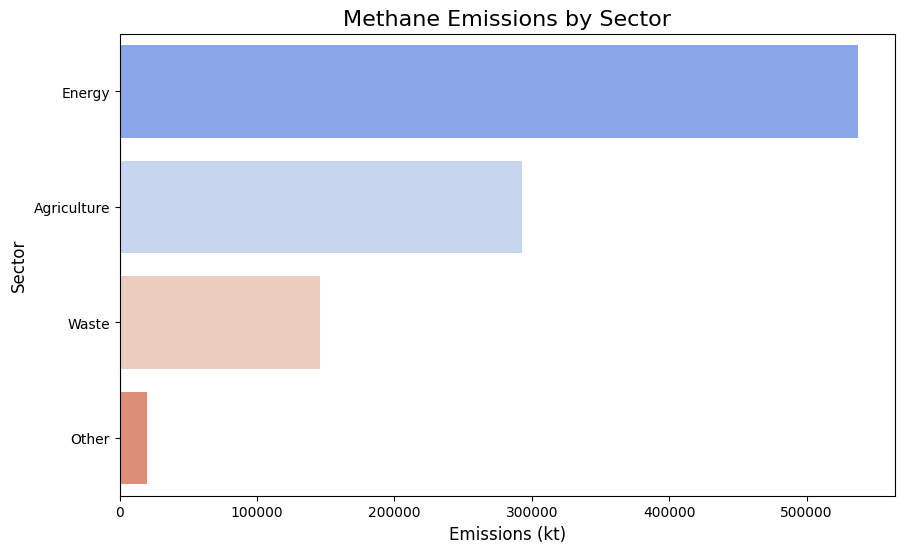

In [10]:
#Plotting emissions by sector
sector_emissions = data.groupby('type')['emissions'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sector_emissions.values, y=sector_emissions.index, palette="coolwarm")
plt.title("Methane Emissions by Sector", fontsize=16)
plt.xlabel("Emissions (kt)", fontsize=12)
plt.ylabel("Sector", fontsize=12)
plt.show()

**Which sector contributes the most/least to methane emissions?** The Energy section contributes to the most methane emissions and Other is the lowest contributer.

**How are emissions distributed across sectors in high-emission countries?** Energy is the dominant sector contributing to emissions. For instance, China and India have the highest emissions in the Energy sector, while Agriculture is the largest contributor in Brazil and India. The Waste sector also contributes significantly, especially in countries like Brazil and the United States. 

This indicates that reducing emissions in these high-emission countries would require targeted efforts across multiple sectors, particularly Energy and Agriculture.

In [11]:
#Showing the sector distribution in a table

#Exclude 'World' from the dataset because it is not a country
data_without_world = data[data['country'] != 'World']

#Group by 'country' and sum emissions to identify high-emission countries
country_emissions = data_without_world.groupby('country')['emissions'].sum().sort_values(ascending=False)

#Extract the top 5 high-emission countries
top_5_countries = country_emissions.head(5)

#Filter the dataset for these high-emission countries
high_emission_countries_data = data_without_world[data_without_world['country'].isin(top_5_countries.index)]

#Group by 'country' and 'type' to see how emissions are distributed across sectors
sector_distribution = high_emission_countries_data.groupby(['country', 'type'])['emissions'].sum().unstack().fillna(0)

#Print the sector distribution for high-emission countries
print("Emissions Distribution Across Sectors in High-Emission Countries:")
print(sector_distribution)


Emissions Distribution Across Sectors in High-Emission Countries:
type            Agriculture        Energy        Other         Waste
country                                                             
Brazil         14020.088867   3512.990745   387.701385   3800.057129
China          18501.914062  50744.444950  1377.870972  10424.141602
India          18358.517578  10370.472352   571.256714   5551.760742
Russia          2022.095947  36156.167841   323.421631   3931.244385
United States   9409.325195  33539.261269   538.362610   5117.928223


# Trends and Patterns

Definitions to help understand:

"All" — This refers to the total emissions for each segment without distinguishing the reason.

"Flared" — These emissions come from combustion processes where gases or other materials are burned off, typically from oil and gas facilities.

"Vented" — These emissions involve releasing gases into the atmosphere without combustion, such as from gas pipelines or facilities for liquefied natural gas (LNG).

"Fugitive" — Emissions that occur unintentionally, such as from leaks in equipment or pipelines.


**Are there correlations between specific segments and reasons for emissions?** Yes, certain activities are linked to specific types of methane emissions. For instance, "Steam Coal" produces the most overall emissions, while "Offshore Oil" and "Onshore Oil" create the most methane from burning gas, and "Gas Pipelines and LNG Facilities" lead to the highest amount of methane released intentionally.

The dataset shows how emissions are categorized based on different segments (e.g., Bioenergy, Coking Coal, Gas Pipelines, etc.) and the reasons for emissions (like Flared, Fugitive, Vented).

In [12]:
#Group by 'segment' and 'reason' and sum emissions
correlation_data = data.groupby(['segment', 'reason'])['emissions'].sum().unstack().fillna(0)

#Display the results
print("Correlation Between Segments and Reasons for Emissions:")
print(correlation_data)


Correlation Between Segments and Reasons for Emissions:
reason                                                    All        Flared  \
segment                                                                       
Bioenergy                                        19134.448077      0.000000   
Coking Coal                                      20323.058074      0.000000   
Gas Pipelines And Lng Facilities                     0.000000      0.000000   
Offshore Gas                                         0.000000      0.000000   
Offshore Oil                                         0.000000   2613.990598   
Onshore Gas                                          0.000000      0.000000   
Onshore Oil                                          0.000000  12757.423631   
Other From Coal                                   3217.824070      0.000000   
Other From Oil And Gas                            4785.509486      0.000000   
Satellite-Detected Large Oil And Gas Emissions    6208.900007      0.000000

# Sub-Sector and Reason

**What are the most common reasons for methane emissions?** The most common reasons for methane emissions in the dataset are "All," which occurs 746 times, followed by "Fugitive" and "Vented," both occurring 342 times, and "Flared," which occurs 118 times.


In [13]:
#Count the occurrences of each reason for emissions
common_reasons = data['reason'].value_counts()

#Display the most common reasons for methane emissions
print("Most Common Reasons for Methane Emissions:")
print(common_reasons)


Most Common Reasons for Methane Emissions:
reason
All         746
Fugitive    342
Vented      342
Flared      118
Name: count, dtype: int64


**Which sub-sector has the largest emissions globally?** 
The sub-sector with the largest emissions globally is: Energy


In [14]:
#Group by 'type' (sub-sector) and sum emissions to find the largest emitting sector
global_emissions_by_subsector = data.groupby('type')['emissions'].sum()

#Find the sub-sector with the largest emissions
largest_subsector = global_emissions_by_subsector.idxmax()

#Display the sub-sector with the largest emissions
print(f"The sub-sector with the largest emissions globally is: {largest_subsector}")


The sub-sector with the largest emissions globally is: Energy
